In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. PREPARACIÓN DE DATOS
def get_anscombe_data():
    x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
    return pd.DataFrame({
        'x1': x, 'y1': [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
        'x2': x, 'y2': [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74],
        'x3': x, 'y3': [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
        'x4': [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8],
        'y4': [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
    })

df = get_anscombe_data()


In [3]:

# 2. MODELADO Y EXTRACCIÓN DE ESTADÍSTICOS DETALLADOS
def perform_regression_analysis(df):
    detailed_results = []

    print("--- RESUMEN DE MODELOS (OLS) ---\n")

    for i in range(1, 5):
        X = df[f'x{i}'].values
        y = df[f'y{i}'].values

        # Añadir constante para statsmodels (intercepto)
        X_with_const = sm.add_constant(X)
        model = sm.OLS(y, X_with_const).fit()

        # Guardar métricas clave
        detailed_results.append({
            'Dataset': f'Dataset {i}',
            'R-squared': model.rsquared,
            'Adj. R-squared': model.rsquared_adj,
            'Intercept': model.params[0],
            'Slope': model.params[1],
            'P-value (Slope)': model.pvalues[1],
            'Std Error (Slope)': model.bse[1],
            'F-statistic': model.fvalue
        })

        # Imprimir el resumen detallado de cada uno para inspección
        print(f"Resultados para el {i}:")
        print(f"R²: {model.rsquared:.3f}, p-valor pendiente: {model.pvalues[1]:.4f}")
        print("-" * 40)

    return pd.DataFrame(detailed_results)

regression_stats = perform_regression_analysis(df)

--- RESUMEN DE MODELOS (OLS) ---

Resultados para el 1:
R²: 0.667, p-valor pendiente: 0.0022
----------------------------------------
Resultados para el 2:
R²: 0.666, p-valor pendiente: 0.0022
----------------------------------------
Resultados para el 3:
R²: 0.666, p-valor pendiente: 0.0022
----------------------------------------
Resultados para el 4:
R²: 0.667, p-valor pendiente: 0.0022
----------------------------------------


In [4]:

# 3. VISUALIZACIÓN DE RESIDUOS (Diagnóstico del modelo)
def plot_diagnostics(df, reg_stats):
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    plt.subplots_adjust(hspace=0.4)

    for i in range(1, 5):
        xi = df[f'x{i}'].values
        yi = df[f'y{i}'].values

        # Re-ajuste rápido para predicciones
        slope = reg_stats.loc[i-1, 'Slope']
        intercept = reg_stats.loc[i-1, 'Intercept']
        y_pred = intercept + slope * xi
        residuals = yi - y_pred

        # Fila 1: Ajuste Lineal
        axes[0, i-1].scatter(xi, yi, color='teal', label='Datos')
        axes[0, i-1].plot(xi, y_pred, color='orange', label='Regresión')
        axes[0, i-1].set_title(f'Ajuste Dataset {i}')
        axes[0, i-1].legend()

        # Fila 2: Análisis de Residuos
        # Si el modelo es bueno, los residuos deben ser aleatorios (Dataset 1)
        axes[1, i-1].scatter(y_pred, residuals, color='purple', marker='x')
        axes[1, i-1].axhline(0, color='black', linestyle='--')
        axes[1, i-1].set_title(f'Residuos vs Predichos ({i})')
        axes[1, i-1].set_xlabel('Predicción')
        axes[1, i-1].set_ylabel('Residuo')

    plt.suptitle('Análisis de Regresión y Diagnóstico de Residuos', fontsize=18)
    plt.show()



Tabla Comparativa de Estadísticos de Regresión:
  Dataset  R-squared  Adj. R-squared  Intercept    Slope  P-value (Slope)  Std Error (Slope)  F-statistic
Dataset 1   0.666542        0.629492   3.000091 0.500091         0.002170           0.117906    17.989943
Dataset 2   0.666242        0.629158   3.000909 0.500000         0.002179           0.117964    17.965648
Dataset 3   0.666324        0.629249   3.002455 0.499727         0.002176           0.117878    17.972276
Dataset 4   0.666707        0.629675   3.001727 0.499909         0.002165           0.117819    18.003288


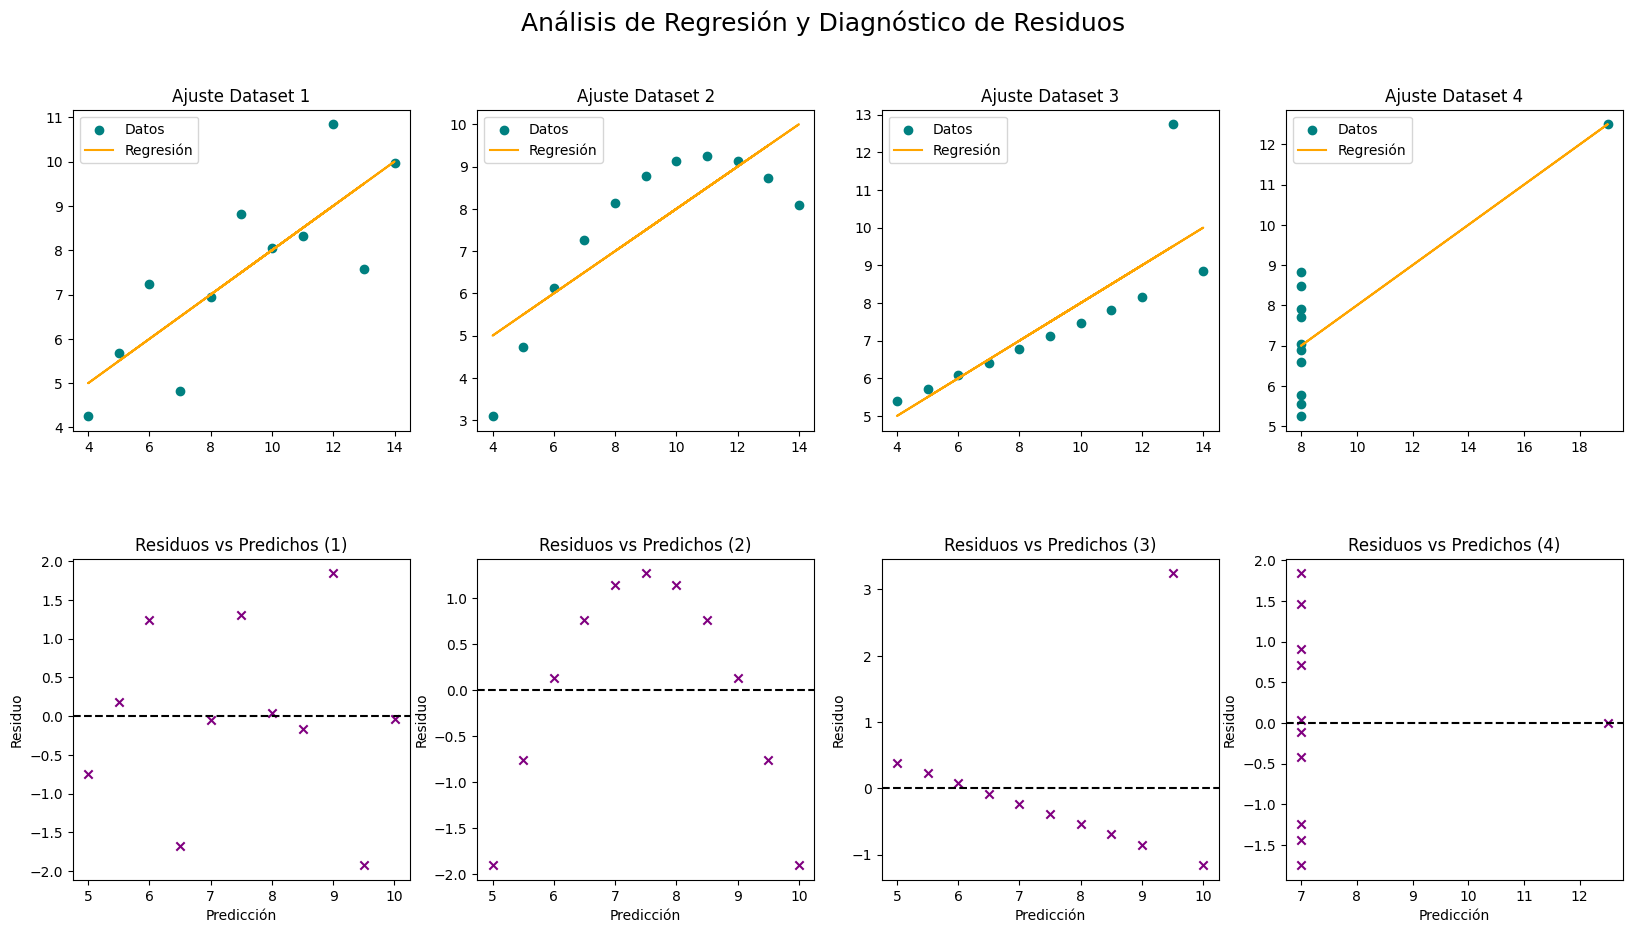

In [5]:
# 4. EJECUCIÓN
print("\nTabla Comparativa de Estadísticos de Regresión:")
print(regression_stats.to_string(index=False))

plot_diagnostics(df, regression_stats)